# Lab | Avila Bible 

In this lab, we will explore the [**Avila Bible dataset**](https://archive.ics.uci.edu/ml/datasets/Avila) which has been extracted from 800 images of the 'Avila Bible', an XII century giant Latin copy of the Bible. The prediction task consists in associating each pattern to a copyist. You will use supervised learning algorithms to figure out what feature patterns each copyist are likely to have and use our model to predict those copyist.

-----------------------------------------------------------------------------------------------------------------

## Before your start:
    - Read the README.md file,
    - Comment as much as you can and use the APIla-bible in the README.md,
    - Happy learning!

In [28]:
# Import your libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

![machine-learning](https://miro.medium.com/proxy/1*halC1X4ydv_3yHYxKqvrwg.gif)

The Avila data set has been extracted from 800 images of the the **Avila Bible**, a giant Latin copy of the whole Bible produced during the XII century between Italy and Spain. The palaeographic analysis of the  manuscript has  individuated the presence of 8 copyists. The pages written by each copyist are not equally numerous. 
Each pattern contains 10 features and corresponds to a group of 4 consecutive rows.

## What am I expected to do?

Well, your prediction task consists in associating each pattern to one of the 8 monks we will be evaluating (labeled as:  Marcus, Clarius, Philippus, Coronavirucus, Mongucus, Paithonius, Ubuntius, Esequlius). For that aim, you should: 
- Train a minimum of 4 different models
- Perform a minimum of 4 Feature Extraction and Engineering techniques
- Must contain a summary of the machine learning tools and algorithms
- and the results or the score obtained with each of them

You won't get much more instructions from now on. Remember to comment your code as much as you can. Keep the requirements in mind and have fun! 

Just one last piece of advice, take a moment to explore the data, remember this dataset contains two files: **train** and **test**. You will find both files in `data` folder. The **test** files contains the data you will predict for, therefore it does not include the labels.
Use the **train** dataset as you wish, but don't forget to split it into **train** and **test** again so you can evaluate your models. Just be sure to train it again with the whole data before predicting.
We have also included a **sample submission** which is of the exact shape and format you must use when evaluating your predictions against the groundtruth through the `APIla-bible`. It won't work unless it is the exact same shape. 



#### Train dataset

In [17]:
train_dataset = pd.read_csv('../data/training_dataset.csv', index_col=0)

In [18]:
train_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922,Marcus
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209,Clarius
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830,Philippus
3,-0.326430,-0.652394,0.384996,-1.694222,-0.185173,-1.138481,-0.232828,-1.747116,-1.183175,-0.807380,Philippus
4,-0.437525,-0.471816,0.463236,-0.545248,0.261718,-0.972381,0.824183,-3.108388,-2.991700,-1.141030,Philippus


#### Test dataset


In [4]:
test_dataset = pd.read_csv('../data/test_dataset.csv', index_col=0)

In [5]:
test_dataset.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.017834,0.132725,0.125378,1.357345,0.261718,0.190314,0.182426,0.445253,-0.715453,0.189796
1,-0.202992,-0.000745,-3.210528,-0.527256,0.082961,0.771662,0.144676,0.098572,0.251173,0.745333
2,1.019049,0.211237,-0.155578,-0.311855,0.261718,0.107265,0.484429,0.339303,-0.310094,-0.049630
3,0.451232,-0.267686,0.335206,-0.831336,0.261718,0.024215,0.220177,0.988787,0.032902,0.025485
4,-0.227680,0.109171,0.413447,0.118917,0.172340,0.480988,0.522180,0.091562,0.313536,0.256389


#### Sample submission

In [6]:
sample_submission = pd.read_csv('../data/sample_submission.csv', header=None, index_col=0)

In [7]:
sample_submission.head()

,1
0,
0,Philippus
1,Ubuntius
2,Esequlius
3,Coronavirucus
4,Philippus


`Keep calm and code on!`

# Challenge - train your models, make the best prediction

--------------------------------------------------------------------------------------------------------------

## 1. Explore the data and deal with features

In [19]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12017 entries, 0 to 12016
Data columns (total 11 columns):
0     12017 non-null float64
1     12017 non-null float64
2     12017 non-null float64
3     12017 non-null float64
4     12017 non-null float64
5     12017 non-null float64
6     12017 non-null float64
7     12017 non-null float64
8     12017 non-null float64
9     12017 non-null float64
10    12017 non-null object
dtypes: float64(10), object(1)
memory usage: 1.1+ MB


First things first, since we know from the competition the name of the columns I will rename them, in order to be able to understand the behaviour of the data:

    F1: intercolumnar distance
    F2: upper margin
    F3: lower margin
    F4: exploitation
    F5: row number
    F6: modular ratio
    F7: interlinear spacing
    F8: weight
    F9: peak number
    F10: modular ratio/ interlinear spacing



In [20]:
train_dataset.rename(columns={"0": "intercolumnar distance",
"1": "upper margin",
"2": "lower margin",
"3": "exploitation",
"4": "row number",
"5": "modular ratio",
"6": "interlinear spacing",
"7": "weight",
"8": "peak number",
"9": "modular ratio/ interlinear spacing",
"10": "scribe"}, inplace=True)

In [21]:
train_dataset.head()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing,scribe
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922,Marcus
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209,Clarius
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830,Philippus
3,-0.326430,-0.652394,0.384996,-1.694222,-0.185173,-1.138481,-0.232828,-1.747116,-1.183175,-0.807380,Philippus
4,-0.437525,-0.471816,0.463236,-0.545248,0.261718,-0.972381,0.824183,-3.108388,-2.991700,-1.141030,Philippus


In [22]:
train_dataset.describe()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing
count,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000
mean,0.021280,0.030684,-0.000379,-0.022127,0.006801,-0.001279,0.032540,-0.006720,-0.011368,-0.026942
std,1.004481,3.661030,1.072319,1.002045,0.963679,1.108192,1.245215,1.012995,1.085821,0.985799
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.164819,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.542563,0.172340,-0.598658,-0.006326,-0.555747,-0.372457,-0.528135
50%,0.056229,-0.055704,0.214288,0.080127,0.261718,-0.058835,0.220177,0.101115,0.064084,-0.053548
75%,0.216699,0.203385,0.349432,0.601905,0.261718,0.522513,0.446679,0.646377,0.500624,0.491862
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,11.911338


In [23]:
corr_ma = train_dataset.corr()
corr_ma[corr_ma>0.8]

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing
intercolumnar distance,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
upper margin,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lower margin,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exploitation,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
row number,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
modular ratio,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
interlinear spacing,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
peak number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
modular ratio/ interlinear spacing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


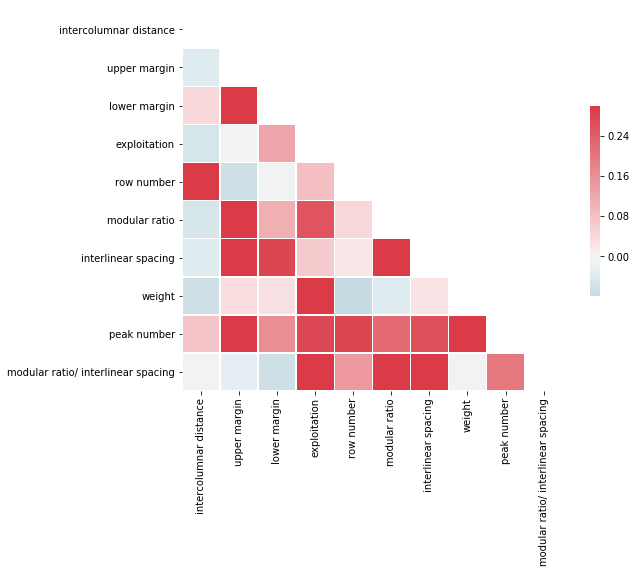

In [29]:
mask = np.zeros_like(corr_ma, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_ma, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The greatest correlation is around 0.25, this means there're not any correlated features

In [30]:
train_dataset['scribe'].value_counts()

Marcus           5107
Clarius          2362
Philippus        1360
Coronavirucus    1009
Mongucus          640
Paithonius        600
Ubuntius          512
Esequlius         427
Name: scribe, dtype: int64

In [32]:
scribes = ('Marcus', 'Clarius', 'Philippus', 'Coronavirucus', 'Mongucus', 'Paithonius', 'Ubuntius', 'Esequlius')
train_dataset.scribe = pd.Categorical(train_dataset.scribe, ordered = True, categories = scribes)
train_dataset['scribe_c'] = train_dataset.scribe.cat.codes

In [33]:
train_dataset.drop(['scribe'], inplace = True, axis=1)

In [34]:
train_dataset.head()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing,scribe_c
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922,0
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209,1
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830,2
3,-0.326430,-0.652394,0.384996,-1.694222,-0.185173,-1.138481,-0.232828,-1.747116,-1.183175,-0.807380,2
4,-0.437525,-0.471816,0.463236,-0.545248,0.261718,-0.972381,0.824183,-3.108388,-2.991700,-1.141030,2


## 2. Train the model

In [35]:
X = train_dataset.drop(['scribe_c'], axis= 1) 
y = train_dataset.scribe_c

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### a. Observamos diferentes modelos

In [37]:
models = {
    "GradientBoostingClassifier" : GradientBoostingClassifier(),
    "GradientBoostingClassifierP" : GradientBoostingClassifier(n_estimators=500, learning_rate=0.3),
    "RandomForestClassifier" : RandomForestClassifier(n_estimators=100),
    "Logistic" : LogisticRegression(),
    "SuperVectorC" : SVC()
}

for modelName, model in models.items():
    print(f"Training model: {modelName}")
    model.fit(X_train, y_train)

Training model: GradientBoostingClassifier
Training model: GradientBoostingClassifierP
Training model: RandomForestClassifier
Training model: Logistic
Training model: SuperVectorC


/home/clara/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/clara/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/clara/.local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [38]:
d = {modelName:model.predict(X_test) for modelName, model in models.items()}
df = pd.DataFrame(d)
df["gt"] = y_test.reset_index(drop=True)
df

,GradientBoostingClassifier,GradientBoostingClassifierP,RandomForestClassifier,Logistic,SuperVectorC,gt
0,3,3,3,3,3,3
1,0,0,0,0,0,0
2,0,0,0,0,1,0
3,1,1,1,0,6,1
4,0,0,0,0,0,0
...,...,...,...,...,...,...
2399,4,4,4,4,4,4
2400,0,0,0,0,0,0
2401,0,0,0,0,0,0
2402,1,1,1,0,2,1


In [39]:
for modelName, model in models.items():    
    print(f"Evaluating model [{modelName}]:")
    print("Accuracy", accuracy_score(df["gt"], df[modelName]))
    print("Precision", precision_score(df["gt"], df[modelName], average='weighted'))
    print("Recall", recall_score(df["gt"], df[modelName], average='weighted'))

Evaluating model [GradientBoostingClassifier]:
Accuracy 0.9430116472545758
Precision 0.943684061953569
Recall 0.9430116472545758
Evaluating model [GradientBoostingClassifierP]:
Accuracy 0.9983361064891847
Precision 0.9983434528948179
Recall 0.9983361064891847
Evaluating model [RandomForestClassifier]:
Accuracy 0.990432612312812
Precision 0.9905106690158957
Recall 0.990432612312812
Evaluating model [Logistic]:
Accuracy 0.5474209650582362
Precision 0.4431177048355775
Recall 0.5474209650582362
Evaluating model [SuperVectorC]:
Accuracy 0.7387687188019967
Precision 0.7497518161577587
Recall 0.7387687188019967


/home/clara/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### b. Una vez vemos cuales son esos mejores modelos, tuneamos sus parámetros

### Gradient Boosting Parametrization
#### A manita

In [40]:
#your code
learning_rate =[0.15,0.1,0.05]
n_estimators = [1500,1750]
min_samples_split = [50, 100]
min_samples_leaf = [50, 100]
for r in learning_rate:
    for n in n_estimators:
        for s in min_samples_split:
            for l in min_samples_leaf:
                tree = GradientBoostingClassifier(learning_rate = r, n_estimators=n, min_samples_split=s, min_samples_leaf=l)
                print("learning_rate:",r,"n_estimators:", n, "min_samples_split:", s, "min_samples_leaf:", l)
                tree.fit(X_train, y_train)
                prediction = tree.predict(X_test)
                print("Accuracy:", round(accuracy_score(y_test, prediction),4))
                print("Precision:", round(precision_score(y_test, prediction,average='weighted'),4))
                print(f"Recall: {round(recall_score(y_test, prediction,average='weighted'),4)}\n")

n_estimators: 1800 min_samples_split: 50 min_samples_leaf: 50
Accuracy: 0.9992
Precision: 0.9992
Recall: 0.9992

n_estimators: 1800 min_samples_split: 50 min_samples_leaf: 100
Accuracy: 0.9992
Precision: 0.9992
Recall: 0.9992

n_estimators: 1800 min_samples_split: 100 min_samples_leaf: 50
Accuracy: 0.9992
Precision: 0.9992
Recall: 0.9992

n_estimators: 1800 min_samples_split: 100 min_samples_leaf: 100
Accuracy: 0.9992
Precision: 0.9992
Recall: 0.9992

n_estimators: 2500 min_samples_split: 50 min_samples_leaf: 50
Accuracy: 0.9992
Precision: 0.9992
Recall: 0.9992

n_estimators: 2500 min_samples_split: 50 min_samples_leaf: 100
Accuracy: 0.9992
Precision: 0.9992
Recall: 0.9992

n_estimators: 2500 min_samples_split: 100 min_samples_leaf: 50
Accuracy: 0.9992
Precision: 0.9992
Recall: 0.9992

n_estimators: 2500 min_samples_split: 100 min_samples_leaf: 100
Accuracy: 0.9992
Precision: 0.9992
Recall: 0.9992



Entrenamos con los que según lo observado serían los mejores parámetros.

In [42]:
chosen_gradient = GradientBoostingClassifier(n_estimators=2500, min_samples_split=100, min_samples_leaf=100)
#chosen_gradient.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=100, min_samples_split=100,
                           min_weight_fraction_leaf=0.0, n_estimators=2500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

#### Con Gridsearch

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
params = {'learning_rate':[0.15,0.1,0.05], 
           'n_estimators':[1500,1750],
           'min_samples_split':[50, 100],
           'min_samples_leaf': [50, 100]}

tuning_gradient = GridSearchCV(estimator=GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid=params, scoring='accuracy',n_jobs=4,iid=False, cv=5)

#tuning_gradient.fit(X_train,y_train)

Acuérdate de usar el parámetro **verbose** para ver qué está haciendo tu GridSearch en la terminal. 

----------------------------------------------------------------------------------------------------------------

## What do I do once I have a prediction?

Once you have already trained your model and made a prediction with it, you are ready to check what is the accuracy of it. 

Save your prediction as a `.csv` file.

In [13]:
#your code here

Now you are ready to know the truth! Are you good enough to call yourself a pro?

Lucky you have the ultimate **APIla-bible** which give you the chance of checking the accuracy of your predictions as many times as you need in order to become the pro you want to be. 

## How do I post my prediction to the APIla-bible?

Easy peasy! You should only fulfil the path to your prediction `.csv` and run the cell below! 

In [54]:
my_submission = "../data/sample_submission.csv"
with open(my_submission) as f:
    res = requests.post("http://apila-bible.herokuapp.com/check", files={"csv_data":f.read()})
res.json()

{'ERROR': 406,
 'Who you gonna call?': 'Ghostbusters!',
 'description': 'Not acceptable. Expected shape of (8012, 1), instead got (8013, 0)'}

![hope-you-enjoy](https://imgs.xkcd.com/comics/machine_learning.png)